# **Hand crafted net**

# Import


In [ ]:
#utils
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import zipfile
from shutil import copyfile
from time import time

from google.colab import drive
from IPython.display import Image

from glob import glob

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Settings for prettier visualization in Google Colab
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
# mount Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

<IPython.core.display.Javascript object>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
base_path = "/content/gdrive/MyDrive/FDL 22/"

<IPython.core.display.Javascript object>

# Train validation split

In [ ]:
# Training set
train_set = keras.preprocessing.image_dataset_from_directory(base_path+"data_puliti/TRAIN",
                                                             image_size=(224,224),
                                                             batch_size = 32,
                                                             label_mode='categorical',
                                                             subset='training',
                                                             validation_split=0.22,
                                                             shuffle=True,
                                                             seed=1)

<IPython.core.display.Javascript object>

Found 3237 files belonging to 5 classes.
Using 2525 files for training.


In [ ]:
# Validation set

val_set = keras.preprocessing.image_dataset_from_directory(base_path+"data_puliti/TRAIN",
                                                           image_size=(224,224),
                                                           batch_size = 32,
                                                           label_mode='categorical',
                                                           subset='validation',
                                                           validation_split=0.22,
                                                           shuffle=False,
                                                           seed=1)

<IPython.core.display.Javascript object>

Found 3237 files belonging to 5 classes.
Using 712 files for validation.


In [ ]:
classes = train_set.class_names
classes

<IPython.core.display.Javascript object>

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
num_classes=5

<IPython.core.display.Javascript object>

# Model

In [ ]:
inputs = keras.Input((224,224,3))

x = inputs

x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.3)(x) 


x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.3)(x) 


x = keras.layers.Conv2D(256, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Dropout(0.3)(x) 

x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.1)(x) 


outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs, outputs)

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

<IPython.core.display.Javascript object>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496 

<IPython.core.display.Javascript object>

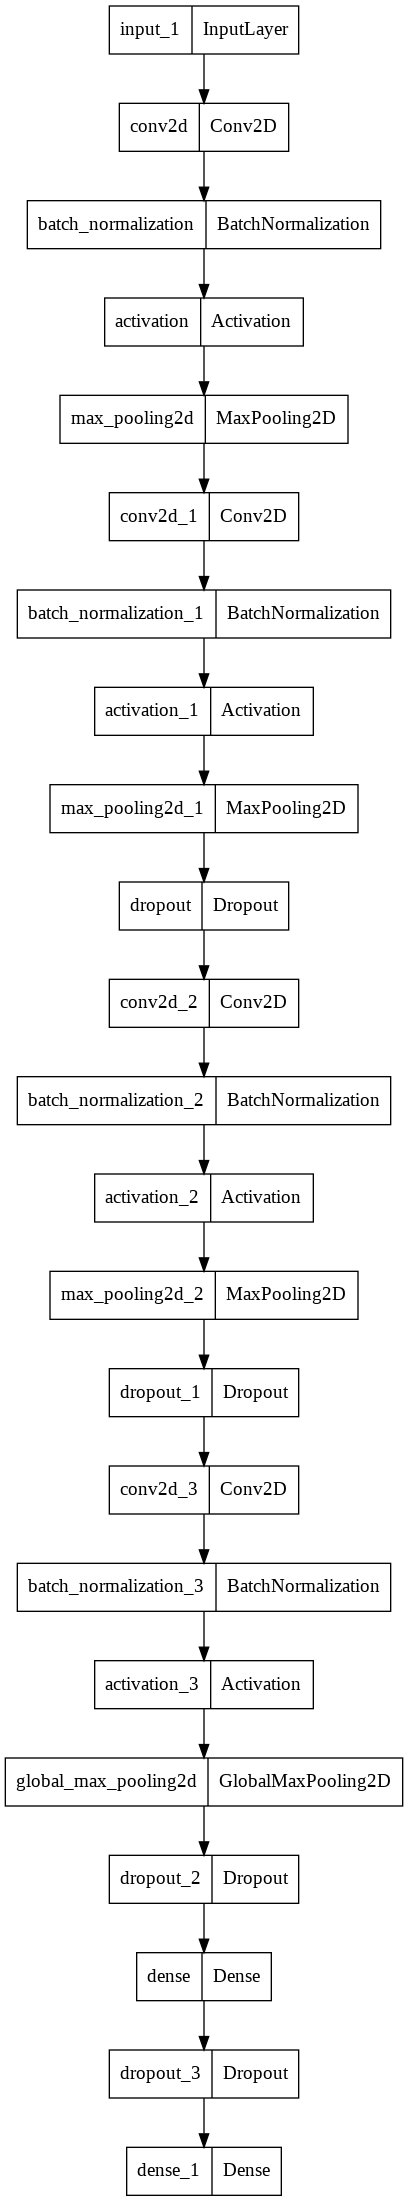

In [ ]:
keras.utils.plot_model(model)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

<IPython.core.display.Javascript object>

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

<IPython.core.display.Javascript object>

In [ ]:
history = model.fit(train_set,
          epochs=30,
          validation_data=val_set,
            callbacks=[callback]);

<IPython.core.display.Javascript object>

Epoch 1/30
79/79 [==============================] - 163s 2s/step - loss: 1.9928 - accuracy: 0.4214 - val_loss: 2.4098 - val_accuracy: 0.3371
Epoch 2/30
79/79 [==============================] - 10s 123ms/step - loss: 1.4465 - accuracy: 0.5422 - val_loss: 1.5156 - val_accuracy: 0.5183
Epoch 3/30
79/79 [==============================] - 10s 119ms/step - loss: 1.3455 - accuracy: 0.5766 - val_loss: 1.1530 - val_accuracy: 0.7514
Epoch 4/30
79/79 [==============================] - 10s 120ms/step - loss: 1.2728 - accuracy: 0.6067 - val_loss: 1.1273 - val_accuracy: 0.7725
Epoch 5/30
79/79 [==============================] - 10s 119ms/step - loss: 1.2271 - accuracy: 0.6356 - val_loss: 1.1099 - val_accuracy: 0.7402
Epoch 6/30
79/79 [==============================] - 10s 118ms/step - loss: 1.1638 - accuracy: 0.6408 - val_loss: 1.4107 - val_accuracy: 0.6180
Epoch 7/30
79/79 [==============================] - 10s 122ms/step - loss: 1.1289 - accuracy: 0.6665 - val_loss: 1.1643 - val_accuracy: 0.7261
E

## Results

<IPython.core.display.Javascript object>

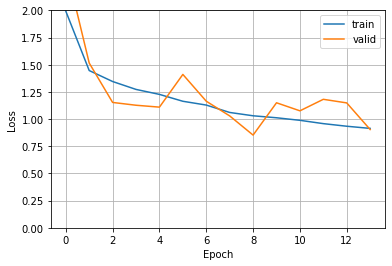

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['train', 'valid'])

<IPython.core.display.Javascript object>

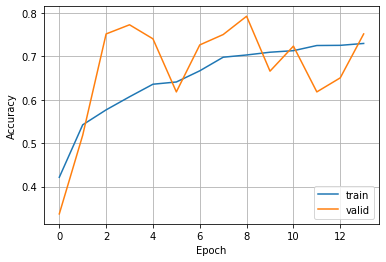

In [ ]:
# Accuracy
#plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.legend(['train', 'valid'])

## Test set

In [ ]:
# Test set
test_set = keras.preprocessing.image_dataset_from_directory(base_path+"data_puliti/TEST",
                                                            image_size=(224,224),
                                                            batch_size=1,
                                                            label_mode='categorical',
                                                            shuffle=False,
                                                            seed=1)

<IPython.core.display.Javascript object>

Found 360 files belonging to 5 classes.


In [ ]:
model.evaluate(test_set) 

<IPython.core.display.Javascript object>

360/360 [==============================] - 2s 6ms/step - loss: 0.8841 - accuracy: 0.7278


[0.8841454982757568, 0.7277777791023254]

# Save model

In [ ]:
model.save("base_net4.h5")

<IPython.core.display.Javascript object>

# Test

<IPython.core.display.Javascript object>

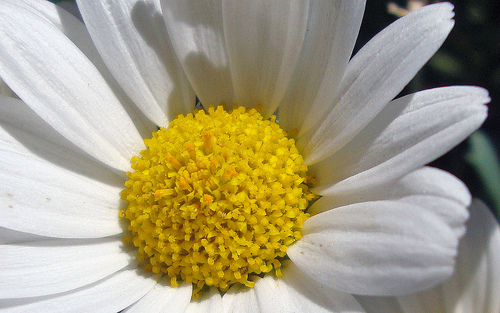

In [ ]:
# marghetita semplice

from IPython.display import Image
img_path =base_path+"data_puliti/TEST/daisy/10140303196_b88d3d6cec.jpg"
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'daisy'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[43.775307 , 27.502817 ,  5.6540794, 21.652683 ,  1.4151164]],
      dtype=float32)

<IPython.core.display.Javascript object>

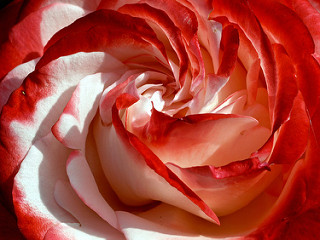

In [ ]:
# rosa semplice
img_path = base_path+'data_puliti/TEST/roses/17449165090_dfb27af360_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'tulips'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[ 0.76686496,  0.54915863, 42.554394  ,  0.86175483, 55.267822  ]],
      dtype=float32)

<IPython.core.display.Javascript object>

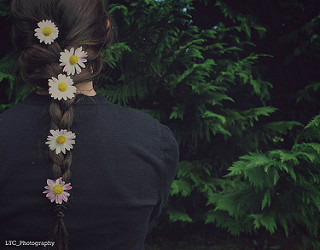

In [ ]:
# margherita ambigua
img_path = base_path+'data_puliti/TEST/daisy/10172636503_21bededa75_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'dandelion'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[13.502071  , 81.689     ,  3.1005445 ,  0.61835665,  1.0900216 ]],
      dtype=float32)

<IPython.core.display.Javascript object>

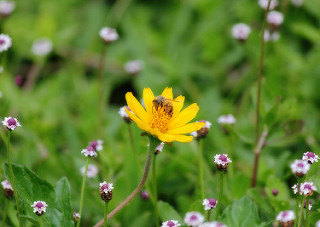

In [ ]:
# dente di leone ambiguo
img_path = base_path+'data_puliti/TEST/dandelion/8716513637_2ba0c4e6cd_n.jpg'
display(Image(img_path,  width=224, height=224))

In [ ]:
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# classe predetta
y_probs = model.predict(img_batch)
Y = np.argmax(y_probs, axis=-1)
classes[int(Y)]

<IPython.core.display.Javascript object>

'dandelion'

In [ ]:
# probabilità per tutte le classi

y_probs*100

<IPython.core.display.Javascript object>

array([[7.9465620e-02, 5.8843834e+01, 1.1447288e-02, 4.0351124e+01,
        7.1413177e-01]], dtype=float32)

# Confusion matrix

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_set:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

<IPython.core.display.Javascript object>

In [ ]:
predictions_class = []
for y in predictions:
  if y == 0:
    predictions_class.append(classes[0])
  elif y == 1:
    predictions_class.append(classes[1])
  elif y == 2:
    predictions_class.append(classes[2])
  elif y == 3:
    predictions_class.append(classes[3])
  else:
    predictions_class.append(classes[4])

labels_class = []
for y in labels:
  if y == 0:
    labels_class.append(classes[0])
  elif y == 1:
    labels_class.append(classes[1])
  elif y == 2:
    labels_class.append(classes[2])
  elif y == 3:
    labels_class.append(classes[3])
  else:
    labels_class.append(classes[4])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

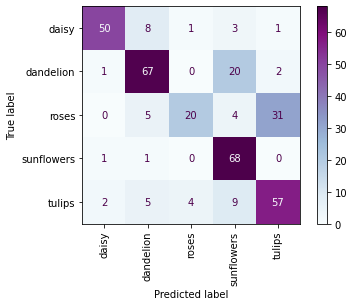

In [ ]:
ConfusionMatrixDisplay.from_predictions(labels_class, predictions_class, cmap='BuPu', xticks_rotation='vertical');

# Classification report

In [ ]:
prediction_classes = np.array([])
true_classes =  np.array([])

for x, y in test_set:
  prediction_classes = np.concatenate([prediction_classes,
                       np.argmax(model.predict(x), axis = -1)])
  true_classes = np.concatenate([true_classes, np.argmax(y.numpy(), axis=-1)])
print(classification_report(true_classes, prediction_classes))


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85        63
         1.0       0.78      0.74      0.76        90
         2.0       0.80      0.33      0.47        60
         3.0       0.65      0.97      0.78        70
         4.0       0.63      0.74      0.68        77

    accuracy                           0.73       360
   macro avg       0.76      0.72      0.71       360
weighted avg       0.75      0.73      0.72       360

